2025-03-16 16:54:21,305 - INFO - Dataset saved as 'fitness_app_users.csv'.
2025-03-16 16:54:21,307 - INFO - Performing exploratory data analysis...


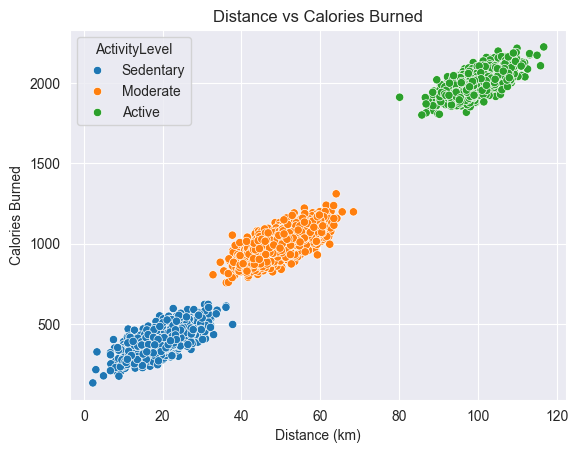

2025-03-16 16:54:21,988 - INFO - Scatter plot saved as "distance_calories_scatter.png".
2025-03-16 16:54:21,989 - INFO - Performing regression analysis...
2025-03-16 16:54:21,999 - INFO -                             OLS Regression Results                            
Dep. Variable:         CaloriesBurned   R-squared:                       0.984
Model:                            OLS   Adj. R-squared:                  0.984
Method:                 Least Squares   F-statistic:                 3.152e+05
Date:                Sun, 16 Mar 2025   Prob (F-statistic):               0.00
Time:                        16:54:21   Log-Likelihood:                -28290.
No. Observations:                5000   AIC:                         5.658e+04
Df Residuals:                    4998   BIC:                         5.660e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef

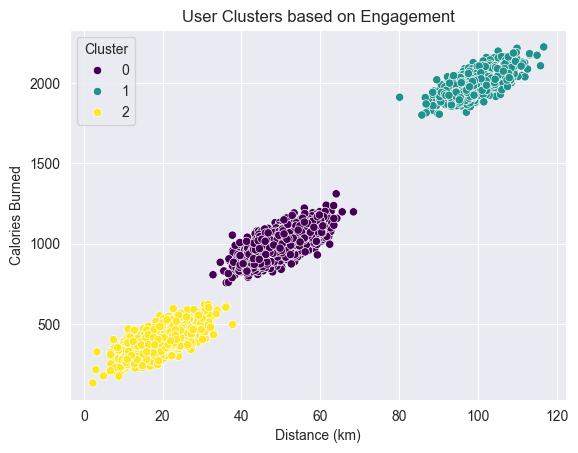

2025-03-16 16:54:22,739 - INFO - Clustering analysis visualization saved as "user_clusters.png".
2025-03-16 16:54:22,740 - INFO - Preparing data for deep learning model...
2025-03-16 16:54:22,748 - INFO - Training neural network model...
/Users/chenghao/PycharmProjects/DataAnalystics/venv/lib/python3.9/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-03-16 16:54:29,039 - INFO - Neural network test accuracy: 0.93


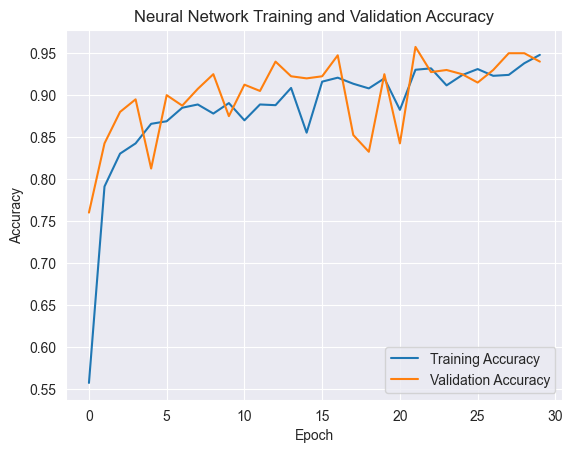

2025-03-16 16:54:29,364 - INFO - Neural network accuracy visualization saved as "nn_training_accuracy.png".


In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import logging
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from tensorflow import keras

# Configure logging
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')
#logging.info('Libraries imported successfully.')

# Generate synthetic user data
num_users = 5000
np.random.seed(42)
#logging.info('Generating synthetic demographic data...')

df = pd.DataFrame({
    'UserID': np.arange(1001, 1001 + num_users),
    'Gender': np.random.choice(['Male', 'Female'], num_users, p=[0.45, 0.55]),
    'Age': np.random.randint(18, 60, num_users),
    'Location': np.random.choice(['Urban', 'Suburban', 'Rural'], num_users, p=[0.5, 0.3, 0.2]),
    'ActivityLevel': np.random.choice(['Sedentary', 'Moderate', 'Active'], num_users, p=[0.3, 0.5, 0.2])
})

#logging.info('Demographic data created successfully.')

# Define activity level stats
activity_dict = {'Sedentary': (50, 20, 200),
                 'Moderate': (100, 50, 500),
                 'Active': (150, 100, 1000)}

# Generate numeric metrics
#logging.info('Generating numeric usage metrics based on activity levels...')
for level, (sessions_mean, distance_mean, calories_base) in activity_dict.items():
    idx = df['ActivityLevel'] == level
    df.loc[idx, 'AppSessions'] = np.random.normal(sessions_mean, 10, size=idx.sum())
    df.loc[idx, 'Distance_km'] = np.random.normal(distance_mean, 5, size=idx.sum())
    df.loc[idx, 'CaloriesBurned'] = df.loc[idx, 'Distance_km'] * 10 + np.random.normal(calories_base, 50, size=idx.sum())

#logging.info('Numeric metrics generated successfully.')

# Save dataset
output_csv = 'fitness_app_users.csv'
df.to_csv(output_csv, index=False)
logging.info(f"Dataset saved as '{output_csv}'.")

# Exploratory Data Analysis
logging.info('Performing exploratory data analysis...')
sns.scatterplot(data=df, x='Distance_km', y='CaloriesBurned', hue='ActivityLevel')
plt.xlabel('Distance (km)')
plt.ylabel('Calories Burned')
plt.title('Distance vs Calories Burned')
plt.savefig('distance_calories_scatter.png')
plt.show()
plt.close()
logging.info('Scatter plot saved as "distance_calories_scatter.png".')

# Regression Analysis
logging.info('Performing regression analysis...')
X = sm.add_constant(df['Distance_km'])
y = df['CaloriesBurned']
regression_model = sm.OLS(y, X).fit()
logging.info(regression_model.summary())

# Clustering Analysis
logging.info('Performing clustering analysis...')
scaler = StandardScaler()
features_scaled = scaler.fit_transform(df[['AppSessions', 'Distance_km', 'CaloriesBurned']])
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(features_scaled)

sns.scatterplot(x='Distance_km', y='CaloriesBurned', hue='Cluster', data=df, palette='viridis')
plt.xlabel('Distance (km)')
plt.ylabel('Calories Burned')
plt.title('User Clusters based on Engagement')
plt.savefig('user_clusters.png')
plt.show()
plt.close()
logging.info('Clustering analysis visualization saved as "user_clusters.png".')

# Deep Learning: Predicting Activity Level
logging.info('Preparing data for deep learning model...')
le = LabelEncoder()
df['ActivityEncoded'] = le.fit_transform(df['ActivityLevel'])

X_nn = pd.get_dummies(df[['Age', 'Gender', 'Location', 'AppSessions', 'Distance_km', 'CaloriesBurned']], drop_first=True)
y_nn = df['ActivityEncoded']
X_train, X_test, y_train, y_test = train_test_split(X_nn, y_nn, test_size=0.2, random_state=42)

logging.info('Training neural network model...')
model = keras.Sequential([
    keras.layers.Dense(16, activation='relu', input_shape=(X_nn.shape[1],)),
    keras.layers.Dense(16, activation='relu'),
    keras.layers.Dense(3, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=30, batch_size=32, validation_split=0.1, verbose=0)

loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
logging.info(f"Neural network test accuracy: {accuracy:.2f}")

# Visualize Training and Validation Accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Neural Network Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.savefig('nn_training_accuracy.png')
plt.show()
plt.close()
logging.info('Neural network accuracy visualization saved as "nn_training_accuracy.png".')
